In [1]:
from tensorflow.keras.models import load_model

model = load_model('IncV3_checkpoint_08Mar.h5')

In [2]:
import numpy as np

In [3]:
x_test = np.load('x_test_IncV3.npy')
y_test_cat = np.load('y_test_cat_IncV3.npy')
print(x_test.shape)

(500, 100, 100, 3)


In [4]:
model.evaluate(x_test, y_test_cat)

16/16 [==============================] - 3s 181ms/step - loss: 0.5138 - accuracy: 0.8280


[0.5137882828712463, 0.828000009059906]

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

quickdraw/angel/4783852876726272.png
Classification: angel


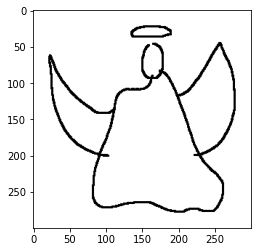

In [38]:
path_orig = 'quickdraw/angel/'
label = os.listdir(path_orig)
labels = ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel']
count = 0

for i in range(len(label)-1):
    path1 = path_orig+label[i]
    img1 = cv2.imread(path1)
    img1_r = cv2.resize(img1, (100,100))
    img1_r = img1_r.reshape(1, 100, 100, 3)
    pred1 = model.predict(img1_r)
    cls1 = np.argmax(pred1, axis = -1)
    if labels[cls1[0]] == 'angel':
        count = count + 1
        if count == 2:
            print(path1)
            plt.imshow(img1)
            print('Classification:', labels[cls1[0]])
            break